In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install matplotlib

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
!pip list

Package                   Version
------------------------- -----------
absl-py                   2.3.1
anaconda-anon-usage       0.7.1
annotated-types           0.6.0
anyio                     4.10.0
archspec                  0.2.3
argon2-cffi               21.3.0
argon2-cffi-bindings      25.1.0
asttokens                 3.0.0
astunparse                1.6.3
async-lru                 2.0.4
attrs                     24.3.0
babel                     2.16.0
beautifulsoup4            4.13.5
bleach                    6.2.0
blinker                   1.9.0
boltons                   24.1.0
Bottleneck                1.4.2
Brotli                    1.0.9
certifi                   2025.11.12
cffi                      1.17.1
charset-normalizer        3.3.2
click                     8.2.1
colorama                  0.4.6
comm                      0.2.3
conda                     25.5.1
conda-anaconda-telemetry  0.1.2
conda-anaconda-tos        0.2.0
conda-content-trust       0.2.0
conda-libmamba-sol

In [5]:
import tensorflow as tf
from tensorflow import keras

Execute

        git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

to get the data

Links:

https://cs231n.github.io/

# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model for classifying images of clothes


## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

## Loading Images

In [6]:
from tensorflow.keras.preprocessing.image import load_img 


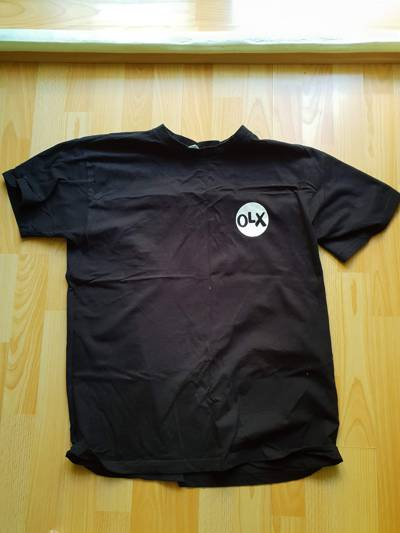

In [7]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = path + '/' + name
load_img(fullname)

In [8]:
fullname

'./clothing-dataset-small/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'

In [9]:
# reduce target size for neural network
img = load_img(fullname, target_size=(299, 299))

In [10]:
# turn image into numpy array

import numpy as np
x = np.array(img)
x.shape

(299, 299, 3)

In [11]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x27480DD9A90>


In [12]:
np.array(img)

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/

        We will use the Xception model


In [13]:
from tensorflow.keras.applications.xception import Xception # import the model from keras applications
from tensorflow.keras.applications.xception import preprocess_input # function to perform preprocessing on images
from tensorflow.keras.applications.xception import decode_predictions # extract the predictions class names in the form of tuple of list

In [14]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))


In [15]:
X = np.array([x])


In [16]:
X.shape

(1, 299, 299, 3)

In [17]:
# Before applying the model we need to do some preprocessing

X = preprocess_input(X)

In [18]:
pred = model.predict(X)
pred.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


(1, 1000)

* The output conatins the propabilty of the image of being in a specific class
* In total there are 1000 classes
* In order to understand the output, we need to now which are the classes
* For that we use the decode_predictions function, which gives the best result

In [19]:
# to make predictions human readable
decode_predictions(pred)

[[('n03595614', 'jersey', np.float32(0.6819633)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038140032)),
  ('n04370456', 'sweatshirt', np.float32(0.034324802)),
  ('n03710637', 'maillot', np.float32(0.011354214)),
  ('n04525038', 'velvet', np.float32(0.0018453582))]]

In [20]:
f"Class {pred.argmax()} has the highest probability: {pred.max():.2f}"


'Class 610 has the highest probability: 0.68'

 * Imagenet does not have a class "t-shirt"
 * To predict the clothing classes we have, we need a different model for that
 * We can use the Xceptions model and adjust it for our purpose
 * We don't have to train it from scratch

## 8.4 Convolutional neural networks

Convolutional neural networks are mostly used for images. They contain a convolutional layer. The Xception model we used is such a convolutional neural network.

**Convolutional Neural Networks (CNN)** contain two types of layers:

* Convolutional layers
* Dense layers
* Convolutional layers

These are like filters containing many small image segments (e.g. 5x5) with lines, shapes, gradients. These small image segments are slid across our input image and the similarity is checked between the image segment and the input image. What results is a feature map, an array with a similarity score between the small image segment (i.e. filter) and a particular location of the image. Each filter results in a feature map. This set of feature maps, can be fed to a second convolutional layer with its own filters. Typically the first layer learns simple filters, subsequent layers learn increasingly more complicated filters. How this happens is that feature maps from one layer are compared. When they have high scores in the same area, these are then combined for the next layer.


The features are learned, so it is not necessary to instruct the neural network to learn certain shapes.

After the convolutional layers, there will be a vector representation of the image. This is fed into the dense layers.

**Dense layers**

The dense layers take the vector representation and turn it into a prediction. If we were to do binary classification, we could for example take the vector representation, multiply each of the elements with a weight, and sum them (i.e. take the inner product). Then we feed that number into the sigmoid function and get a prediction (e.g. whether it is a t-shirt or not).

Now, if we want to do multi-class classification, we can create a model for each class. For example, one for t-shirts, one for shirts, one for dressed, and so on. Each model has its own weights. We calculate the inner products for each class. Then, instead of feeding it into a sigmoid for each class, we use the softmax function, which outputs probabilities for all classes, ensuring they sum to 1.

The naming 'dense layer' is because each element of the input is connected to each element of the output. Similar as with the convolutional layers, we can have multiple dense layers.


There are more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer Learning

* Use a network that was trained on the imagente dataset transer_learning

* Reading data with ImageDataGenerator
* Train Xception on smaller images (150x150)
* We will use the convolutioal part of the network that converts the image into a vector representation.


(Better to run it with a GPU)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [22]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [23]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [24]:
# look at one image and target
X, y = next(train_ds)

In [25]:
!python --version

Python 3.13.5


In [26]:
y[:5] # multiclasss classification

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

* Now do the same for the validation dataset

In [27]:
X.shape

(32, 150, 150, 3)

In [28]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# read images from directory
val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


* Create the base model

In [29]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [30]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [31]:
preds.shape


(32, 10)

* Create the base model

In [32]:
base_model = Xception(weights='imagenet', 
                      include_top=False, 
                      input_shape=(150, 150, 3))

base_model.trainable = False

* Create a new top

In [33]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs)

outputs = base

model = keras.Model(inputs, outputs)

In [34]:
preds = model.predict(X)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [35]:
preds.shape


(32, 5, 5, 2048)

So we have our image which is an input with shape (150, 150, 3). It goes into the base_model and what we get out is called base. That is assigned to outputs. Then a keras model is made with inputs and outputs. Then we can use model.predict(X), where X is a batch of 32 images.

The predictions preds have a strange shape (32, 5, 5, 2048). It is not a vector representation yet. We will turn base into into a vector. The way we do this is by taking the (5, 5) matrices inside preds and average it. This is called two-dimensional average pooling.

* Turn this output into a vector

In [36]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs)
pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base)

outputs = vectors

model = keras.Model(inputs, outputs)

In [37]:
preds = model.predict(X)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [38]:
preds.shape


(32, 2048)

* Add the output layer

In [39]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

* This model still has to be trained!

In [40]:
learning_rate = 0.1
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

By specifying from_logits=True, we are using the inner product of all the parameters and weights in a layer directly, rather than using an activation function. If we specify from_logits=False, we'd have to specify an activation function in the output layer:

outputs = tf.keras.layers.Dense(10, activation="softmax")(vectors)
Now we will compile the model:

In [41]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

We will fit the model on each batch of 32 images. After cycling to all batches, we will have completed one epoch.

In [42]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.6415 - loss: 11.1447 - val_accuracy: 0.7067 - val_loss: 7.4955
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.7715 - loss: 5.1294 - val_accuracy: 0.7801 - val_loss: 6.6120
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.8693 - loss: 2.4128 - val_accuracy: 0.7595 - val_loss: 7.9411
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.8820 - loss: 2.2729 - val_accuracy: 0.7801 - val_loss: 7.5624
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.9123 - loss: 1.6939 - val_accuracy: 0.8006 - val_loss: 8.0236
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.9247 - loss: 1.3114 - val_accuracy: 0.7801 - val_loss: 9.0409
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.9048 - loss: 1.9948 - val_accuracy: 0.7683 - val_loss: 8.2842
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.9241 - loss: 1.3850 - val_accuracy: 0.7683 - 

Accuracy on training is quite high, but validation not as high. This indicates overfitting.


In [43]:
history.history['accuracy']

[0.6414602398872375,
 0.7715123891830444,
 0.8386570811271667,
 0.8692959547042847,
 0.8820078372955322,
 0.9123207330703735,
 0.9247066378593445,
 0.9048240184783936,
 0.924054741859436,
 0.9416558146476746]

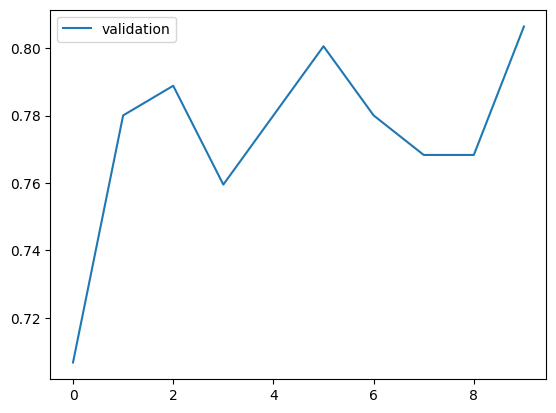

In [44]:
import matplotlib.pyplot as plt

# plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="validation")
plt.legend();

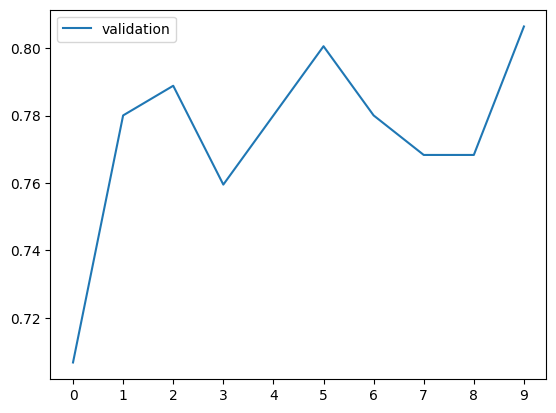

In [45]:
# plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="validation")
plt.xticks(np.arange(10))
plt.legend();

**This model achieved 81% accuracy approximately**

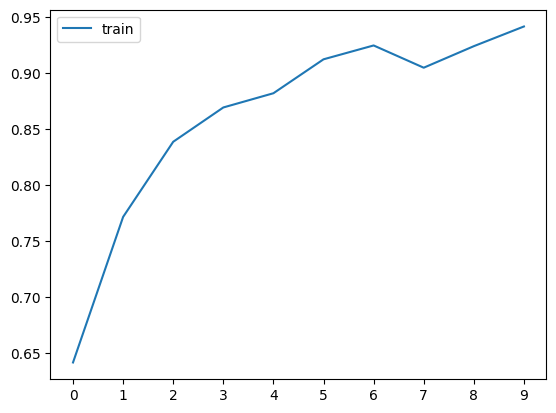

In [46]:
plt.plot(history.history['accuracy'], label="train")
# plt.plot(history.history['val_accuracy'], label="validation")
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the Learning Rate

* Too high learning rate may lead to overfitting, too low learning rate may take very long

Learning rate is one of the most important hyperparameters for neural network training. If learning rate is too high, training will be relatively faster, but you'll likely overfit and perform poorly on validation. if it is too low, model training will be too slow. You'll likely underfit and perform poorly on validation. If you balance the learning rate well, the model training will not take too long and perform well on the validation data.

In [47]:
def _create_architecture():
    base_model = Xception(
        weights="imagenet", 
        include_top=False, 
        input_shape=(150, 150, 3))
    
    base_model.trainable = False  
    inputs = tf.keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)  # we want to apply inputs to base_model and the result is called base
    vectors = tf.keras.layers.GlobalAveragePooling2D()(base)
    outputs = tf.keras.layers.Dense(10)(vectors)
    model = tf.keras.Model(inputs, outputs)  # we need to wrap a keras model around inputs and outputs
    
    return model

def make_model(learning_rate=0.01):
    model = _create_architecture()
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=["accuracy"]
    )

    return model    

In [48]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    model = make_model(lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.2751 - loss: 2.0732 - val_accuracy: 0.4282 - val_loss: 1.6963
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.5632 - loss: 1.4351 - val_accuracy: 0.5865 - val_loss: 1.2898
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.6483 - loss: 1.1609 - val_accuracy: 0.6569 - val_loss: 1.0957
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 243s 2s/step - accuracy: 0.6851 - loss: 1.0127 - val_accuracy: 0.6950 - val_loss: 0.9701
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.7119 - loss: 0.9160 - val_accuracy: 0.7243 - val_loss: 0.8909
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.7262 - loss: 0.8474 - val_accuracy: 0.7537 - val_loss: 0.8284
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.7373 - loss: 0.7941 - val_accuracy: 0.7654 - val_loss: 0.7876
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.7529 - loss: 0.7517 - val_accuracy: 0.7

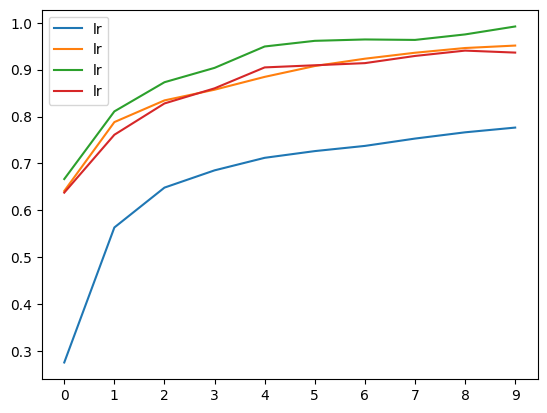

In [49]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label="lr")
    plt.xticks(np.arange(10))
plt.legend();

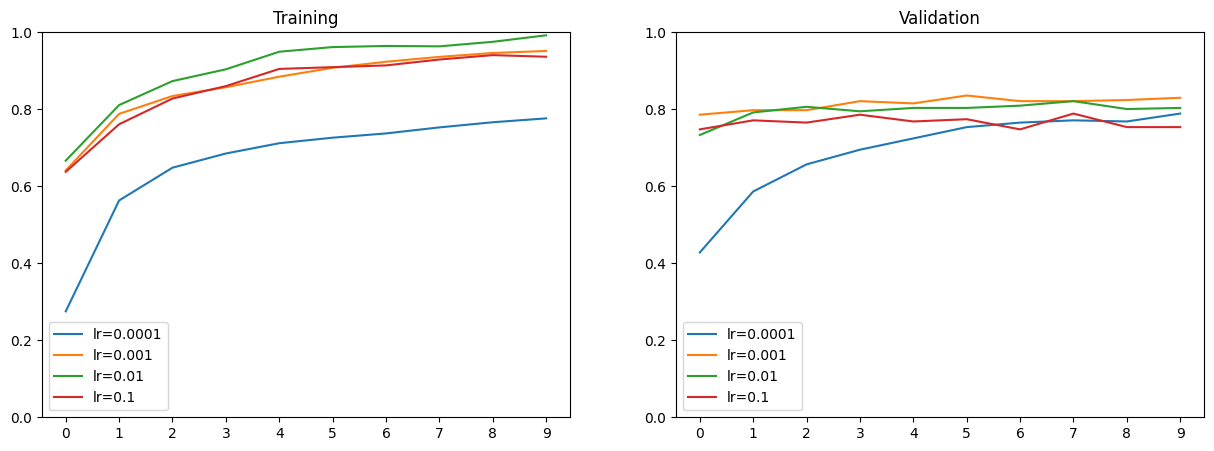

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

for lr, history in scores.items():
    ax[0].plot(history["accuracy"], label=f"lr={lr}")
    ax[1].plot(history["val_accuracy"], label=f"lr={lr}")
ax[0].legend()
ax[1].legend()
ax[0].set_ylim([0, 1])
ax[1].set_ylim([0, 1])
ax[0].set_title("Training")
ax[1].set_title("Validation")
ax[0].set_xticks(np.arange(0,10));
ax[1].set_xticks(np.arange(0,10));